In [1]:
RANDOM_SEED = 42

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import pickle

In [3]:
train_stage_2_RF = pd.read_csv("data/train_stage_2.csv")

X_train = train_stage_2_RF.drop(columns=["Label"])
y_train = train_stage_2_RF["Label"]

del train_stage_2_RF

In [4]:
validation_stage_2_RF = pd.read_csv("data/validation_stage_2.csv")

X_val = validation_stage_2_RF.drop(columns=["Label"])
y_val = validation_stage_2_RF["Label"]

del validation_stage_2_RF

In [5]:
with open(f"Repositório_Base/models/stage2_rf_scaler.p","rb") as f:
    stage2_scaler = pickle.load(f)

d:\Disciplinas\intrusao\Projeto\Sistema_Hierarquico\Deteccao_de_Intrusao_Hierarquica_Multiestagio\env\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator QuantileTransformer from version 1.1.1 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
floresta = RandomForestClassifier(max_features=0.1751204590963604,
                       max_samples=0.9034128710297624, n_estimators=97,
                       random_state=RANDOM_SEED)


In [7]:
stage2 = Pipeline([("scaler",stage2_scaler),("floresta",floresta)])
stage2.fit(X_train,y_train)

Pipeline(steps=[('scaler',
                 QuantileTransformer(output_distribution='normal',
                                     subsample=100000)),
                ('floresta',
                 RandomForestClassifier(max_features=0.1751204590963604,
                                        max_samples=0.9034128710297624,
                                        n_estimators=97, random_state=42))])

In [8]:
y_pred_train = stage2.predict(X_train)
print(classification_report(y_train ,y_pred_train))

              precision    recall  f1-score   support

      (D)DOS       1.00      1.00      1.00      1076
      Botnet       1.00      1.00      1.00      1040
 Brute Force       1.00      1.00      1.00      1100
   Port Scan       1.00      1.00      1.00      1066
  Web-Attack       1.00      1.00      1.00      1038

    accuracy                           1.00      5320
   macro avg       1.00      1.00      1.00      5320
weighted avg       1.00      1.00      1.00      5320



In [9]:
np.unique(y_val)

array(['(D)DOS', 'BENIGN', 'Botnet', 'Brute Force', 'Port Scan',
       'Web-Attack'], dtype=object)

In [10]:
y_val_anomalia = y_val[y_val != "BENIGN"]
X_val_anomalia = X_val[y_val != "BENIGN"]
y_pred_val = stage2.predict(X_val[y_val != "BENIGN"])
print(classification_report(y_val[y_val != "BENIGN"] ,y_pred_val))

              precision    recall  f1-score   support

      (D)DOS       1.00      1.00      1.00       300
      Botnet       1.00      1.00      1.00       300
 Brute Force       1.00      1.00      1.00       300
   Port Scan       1.00      1.00      1.00       300
  Web-Attack       1.00      1.00      1.00       300

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



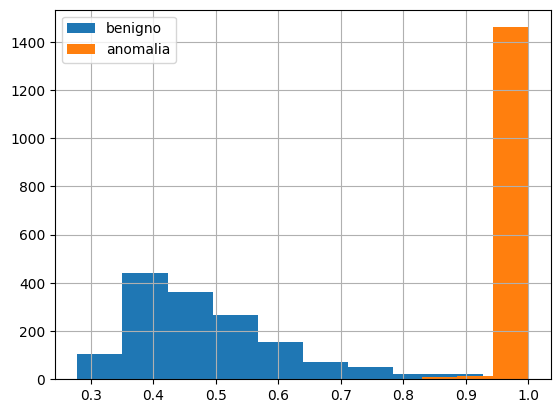

In [19]:
y_score_anomalia = stage2.predict_proba(X_val_anomalia)
y_score_benigno  = stage2.predict_proba(X_val[y_val == "BENIGN"])

pd.Series(y_score_benigno.max(axis=1)).hist(label= 'benigno')
pd.Series(y_score_anomalia.max(axis=1)).hist(label= 'anomalia')
plt.legend()
plt.show()

In [21]:
y_score_anomalia

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [20]:
with open('SecondStage.p', 'wb') as segundo_estagio_file:
    pickle.dump(stage2, segundo_estagio_file)

In [22]:
stage2.classes_

array(['(D)DOS', 'Botnet', 'Brute Force', 'Port Scan', 'Web-Attack'],
      dtype=object)